In [758]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [759]:
df = pd.read_csv('Salary_Prediction.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [760]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [761]:
df['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)', '-1'], dtype=object)

In [762]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [763]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [764]:
df2 = df[['Rating', 'Size', 'Founded', 'Type of ownership', 'Revenue', 'hourly','employer_provided','min_salary','max_salary','avg_salary','company_txt','job_state','same_state','age','python_yn','R_yn','spark','aws','excel','job_simp','seniority','desc_len','num_comp']]
df2.head()

,Rating,Size,Founded,Type of ownership,Revenue,hourly,employer_provided,min_salary,max_salary,avg_salary,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,3.8,501 to 1000 employees,1973,Company - Private,$50 to $100 million (USD),0,0,53,91,72.0,...,47,1,0,0,0,1,data scientist,na,2536,0
1,3.4,10000+ employees,1984,Other Organization,$2 to $5 billion (USD),0,0,63,112,87.5,...,36,1,0,0,0,0,data scientist,na,4783,0
2,4.8,501 to 1000 employees,2010,Company - Private,$100 to $500 million (USD),0,0,80,90,85.0,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3.8,1001 to 5000 employees,1965,Government,$500 million to $1 billion (USD),0,0,56,97,76.5,...,55,1,0,0,0,0,data scientist,na,3883,3
4,2.9,51 to 200 employees,1998,Company - Private,Unknown / Non-Applicable,0,0,86,143,114.5,...,22,1,0,0,0,1,data scientist,na,2728,3


In [765]:
encoder = OneHotEncoder(sparse_output=False)
encoder2 = LabelEncoder()

df2['encoded_company'] = encoder2.fit_transform(df2['company_txt'])
df2['encoded_size'] = encoder2.fit_transform(df2['Size'])
df2['encoded_ownership'] = encoder2.fit_transform(df2['Type of ownership'])
df2['encoded_revenue'] = encoder2.fit_transform(df2['Revenue'])
df2['encoded_state'] = encoder2.fit_transform(df2['job_state'])
df2['encoded_job'] = encoder2.fit_transform(df2['job_simp'])
df2['encoded_seniority'] = encoder2.fit_transform(df2['seniority'])

df2.drop(['Size', 'Type of ownership', 'Revenue', 'company_txt', 'job_state', 'job_simp', 'seniority'], axis=1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7828\2671342752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['encoded_company'] = encoder2.fit_transform(df2['company_txt'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_7828\2671342752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['encoded_size'] = encoder2.fit_transform(df2['Size'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_7828\2671342752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [766]:
y = df2['avg_salary']
x = df2.drop(columns=['avg_salary'])

x_train, x_test, y_train, y_test = train_test_split(x, y)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

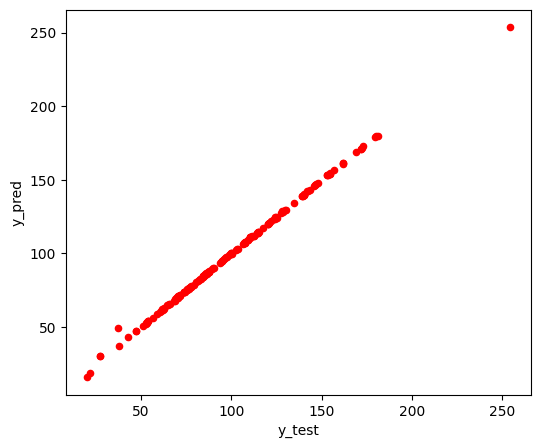


R2 (Linear Regression) = 0.999
R2 (Ridge) = 0.999
R2 (Lasso) = 0.999


In [767]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, s=20, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

r2 = model.score(x_test_scaled, y_test)
print('\nR2 (Linear Regression) = {:.3f}'.format(r2))

model = Ridge(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Ridge) = {:.3f}'.format(r2))

model = Lasso(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Lasso) = {:.3f}'.format(r2))

              Feature  Importance
5          max_salary   22.862742
4          min_salary   15.880887
2              hourly    4.408377
6          same_state    0.188136
3   employer_provided    0.164126
19      encoded_state    0.134279
20        encoded_job    0.129484
0              Rating    0.117166
21  encoded_seniority    0.115373
12              excel    0.089109


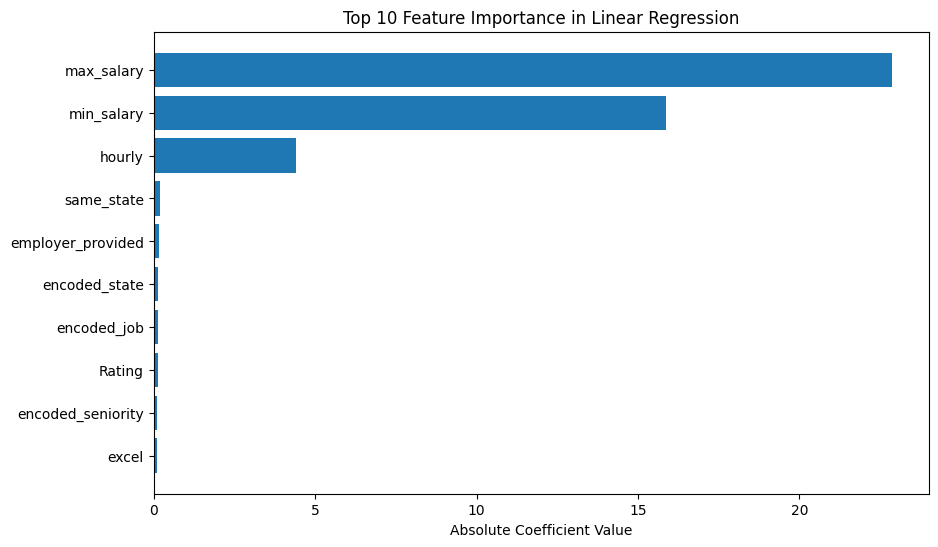

In [768]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

importance = abs(model.coef_)

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df.head(10)
print(top_10_features)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()

                     Rating   Founded    hourly  employer_provided   
Rating             1.000000  0.332927 -0.019531          -0.468234  \
Founded            0.332927  1.000000  0.049313          -0.312761   
hourly            -0.019531  0.049313  1.000000           0.124748   
employer_provided -0.468234 -0.312761  0.124748           1.000000   
min_salary        -0.009573 -0.033999 -0.203556           0.187591   
max_salary         0.027344  0.006776 -0.276730           0.028794   
avg_salary         0.013492 -0.015149 -0.356082           0.076287   
same_state         0.085033  0.171512 -0.067351          -0.081349   
age                0.021655  0.134682  0.007626          -0.109288   
python_yn          0.144665  0.103183 -0.193487          -0.107924   
R_yn              -0.004472  0.016045 -0.009505          -0.007961   
spark              0.156982  0.066978 -0.098530          -0.082524   
aws                0.117049 -0.011123 -0.030315          -0.000685   
excel             -0

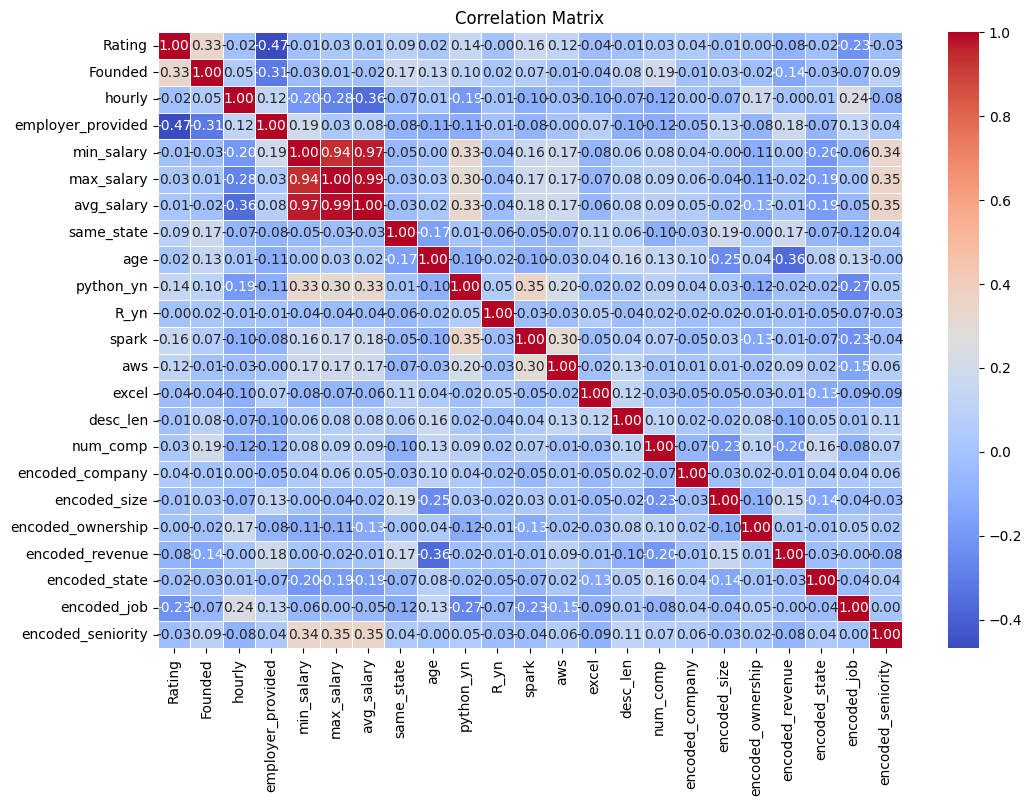

In [769]:
correlation_matrix = df2.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

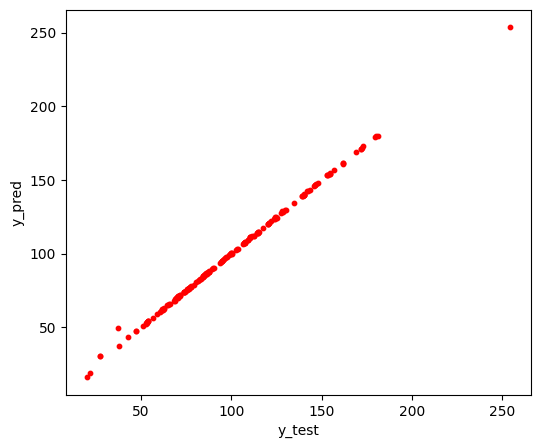


R2 (Locally Weighted Regression) = 0.999


In [770]:
def get_weight(train, test, tau):
    d2 = np.sum(np.square(train - test), axis=1)
    w = np.exp(-d2 / (2. * tau * tau))
    return w

y_pred = []
for tx in x_test_scaled:
    weight = get_weight(x_train_scaled, tx, 50.0) 
    model = Ridge(alpha=0.01)
    model.fit(x_train_scaled, y_train, sample_weight = weight)
    y_pred.append(model.predict(tx.reshape(1, -1))[0])

y_pred = np.array(y_pred).reshape(-1,)

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, s=10, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

print('\nR2 (Locally Weighted Regression) = {:.3f}'.format(r2_score(y_test, y_pred)))

In [771]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse:.3f}')

Root Mean Squared Error: 1.076


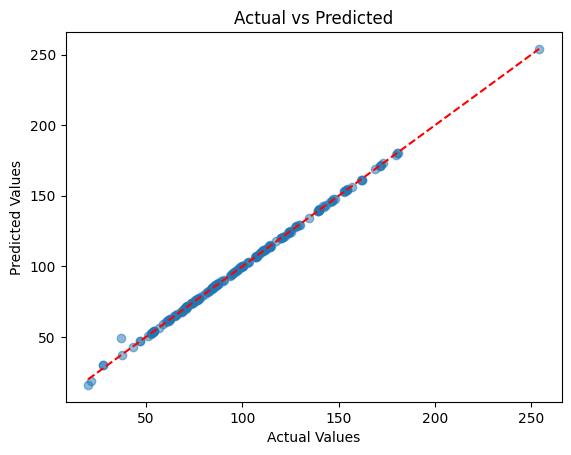

In [772]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.show()

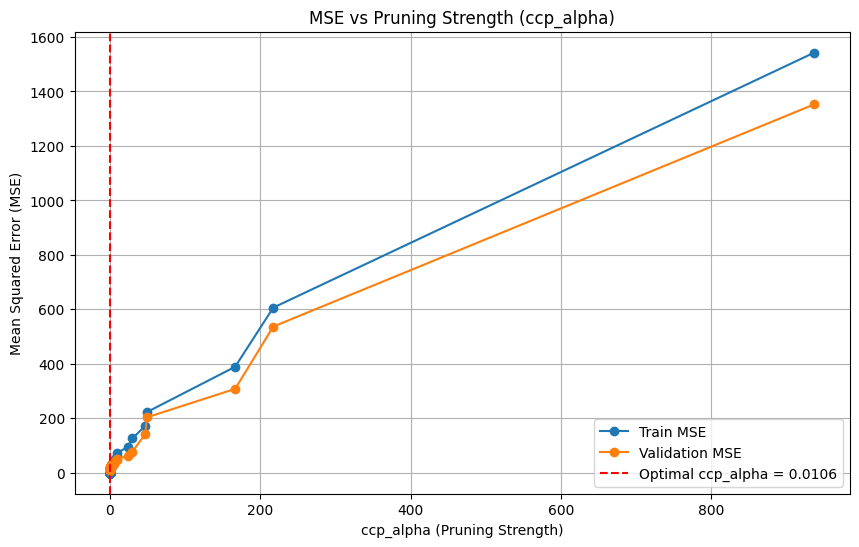

The optimal pruning strength (ccp_alpha) is 0.0106.


In [773]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

train_mse = []
eval_mse = []
ccp_alphas = []

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(x_train, y_train)
    
    y_train_pred = pruned_tree.predict(x_train)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    
    y_eval_pred = pruned_tree.predict(x_eval)
    eval_mse.append(mean_squared_error(y_eval, y_eval_pred))

opt_alpha_idx = np.argmin(eval_mse)
opt_ccp_alpha = ccp_alphas[opt_alpha_idx]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_mse, marker='o', label='Train MSE')
plt.plot(ccp_alphas, eval_mse, marker='o', label='Validation MSE')
plt.axvline(x=opt_ccp_alpha, ls='--', color='red', label=f'Optimal ccp_alpha = {opt_ccp_alpha:.4f}')
plt.legend()
plt.title('MSE vs Pruning Strength (ccp_alpha)')
plt.xlabel('ccp_alpha (Pruning Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid()
plt.show()

print(f"The optimal pruning strength (ccp_alpha) is {opt_ccp_alpha:.4f}.")


In [774]:
df2 = df2.drop(columns=['min_salary', 'max_salary'])

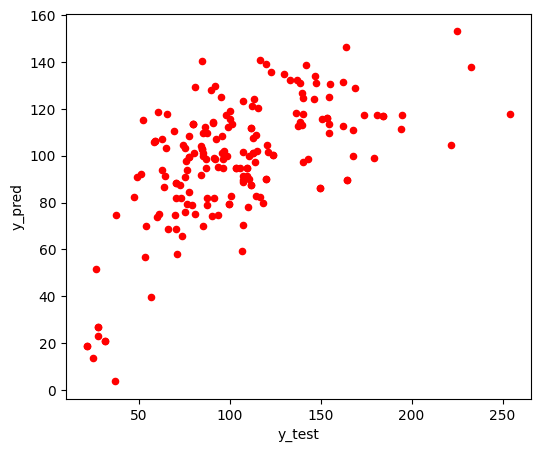


R2 (Linear Regression) = 0.356
R2 (Ridge) = 0.356
R2 (Lasso) = 0.356


In [775]:
y = df2['avg_salary']
x = df2.drop(columns=['avg_salary'])


x_train, x_test, y_train, y_test = train_test_split(x, y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, s=20, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

r2 = model.score(x_test_scaled, y_test)
print('\nR2 (Linear Regression) = {:.3f}'.format(r2))

model = Ridge(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Ridge) = {:.3f}'.format(r2))

model = Lasso(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Lasso) = {:.3f}'.format(r2))

              Feature  Importance
19  encoded_seniority   11.968306
2              hourly   10.729079
6           python_yn    8.970488
17      encoded_state    8.312439
3   employer_provided    6.007837
10              excel    4.031773
9                 aws    3.226006
0              Rating    3.020133
5                 age    2.872680
18        encoded_job    2.575091


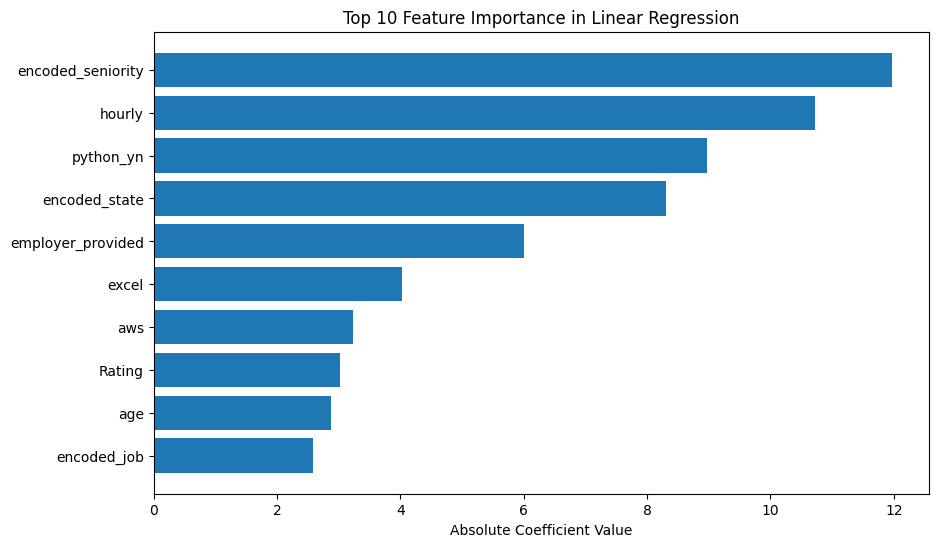

In [776]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

importance = abs(model.coef_)

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df.head(10)
print(top_10_features)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()

                     Rating   Founded    hourly  employer_provided   
Rating             1.000000  0.332927 -0.019531          -0.468234  \
Founded            0.332927  1.000000  0.049313          -0.312761   
hourly            -0.019531  0.049313  1.000000           0.124748   
employer_provided -0.468234 -0.312761  0.124748           1.000000   
avg_salary         0.013492 -0.015149 -0.356082           0.076287   
same_state         0.085033  0.171512 -0.067351          -0.081349   
age                0.021655  0.134682  0.007626          -0.109288   
python_yn          0.144665  0.103183 -0.193487          -0.107924   
R_yn              -0.004472  0.016045 -0.009505          -0.007961   
spark              0.156982  0.066978 -0.098530          -0.082524   
aws                0.117049 -0.011123 -0.030315          -0.000685   
excel             -0.036466 -0.035567 -0.099897           0.074129   
desc_len          -0.012281  0.083119 -0.073194          -0.102218   
num_comp           0

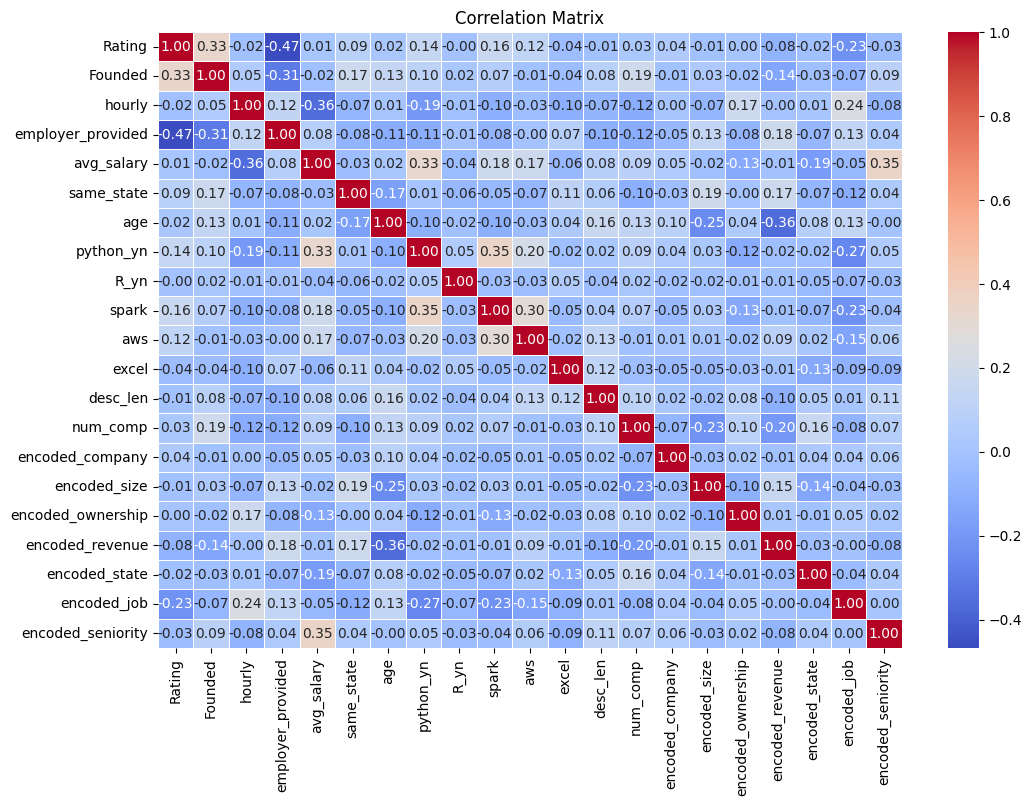

In [777]:
correlation_matrix = df2.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

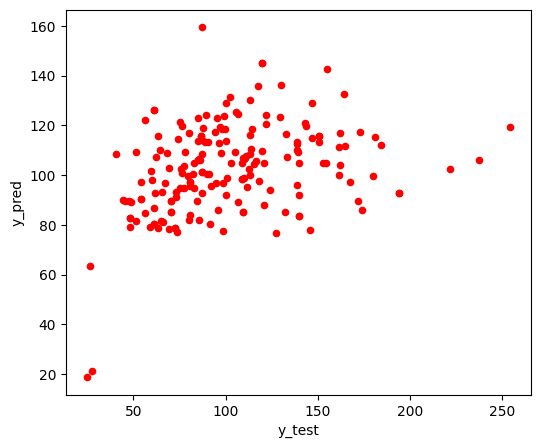


R2 (Linear Regression) = 0.103
R2 (Ridge) = 0.103
R2 (Lasso) = 0.103
              Feature  Importance
0              hourly   13.574581
4           python_yn   10.084814
1   employer_provided    7.432282
8               excel    4.815441
7                 aws    3.250699
9            desc_len    2.562599
6               spark    2.512423
3                 age    2.506346
10           num_comp    1.369638
5                R_yn    0.466043


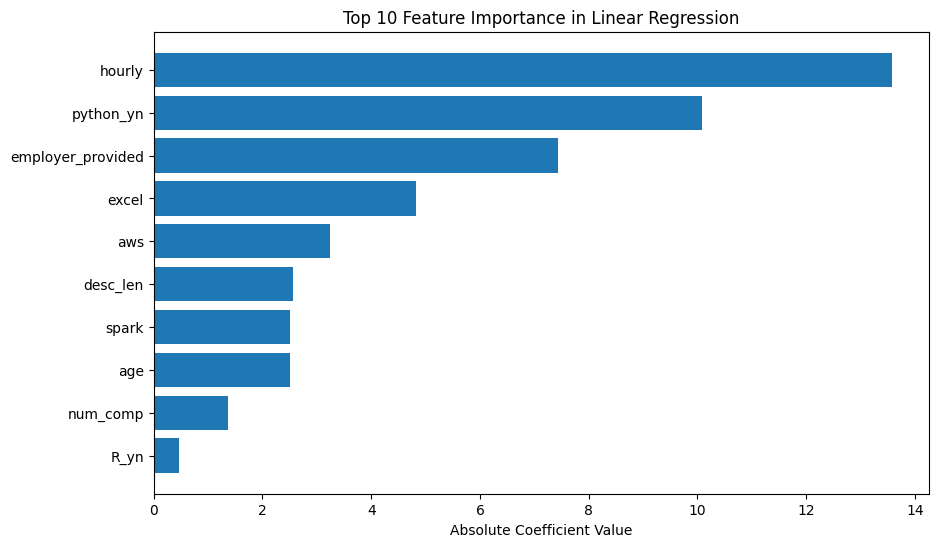

In [778]:
df2 = df[['hourly','employer_provided','avg_salary', 'same_state','age','python_yn','R_yn','spark','aws','excel','desc_len','num_comp']]
df2.head()

y = df2['avg_salary']
x = df2.drop(columns=['avg_salary'])

x_train, x_test, y_train, y_test = train_test_split(x, y)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, s=20, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

r2 = model.score(x_test_scaled, y_test)
print('\nR2 (Linear Regression) = {:.3f}'.format(r2))

model = Ridge(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Ridge) = {:.3f}'.format(r2))

model = Lasso(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Lasso) = {:.3f}'.format(r2))

# feature importance
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

importance = abs(model.coef_)

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df.head(10)
print(top_10_features)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()

                     hourly  employer_provided  avg_salary  same_state   
hourly             1.000000           0.124748   -0.356082   -0.067351  \
employer_provided  0.124748           1.000000    0.076287   -0.081349   
avg_salary        -0.356082           0.076287    1.000000   -0.034641   
same_state        -0.067351          -0.081349   -0.034641    1.000000   
age                0.007626          -0.109288    0.019655   -0.166680   
python_yn         -0.193487          -0.107924    0.327796    0.006975   
R_yn              -0.009505          -0.007961   -0.040000   -0.058407   
spark             -0.098530          -0.082524    0.176559   -0.053139   
aws               -0.030315          -0.000685    0.171379   -0.065070   
excel             -0.099897           0.074129   -0.057252    0.106026   
desc_len          -0.073194          -0.102218    0.078808    0.062387   
num_comp          -0.117265          -0.116665    0.093813   -0.102635   

                        age  python_y

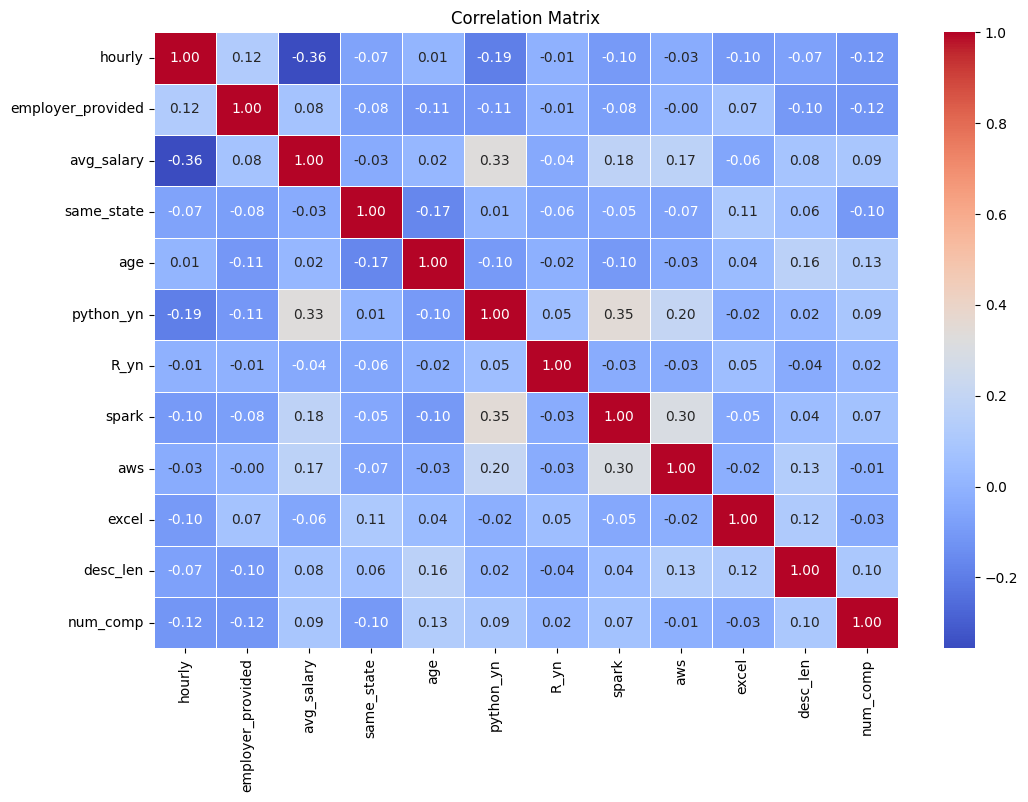

In [779]:
correlation_matrix = df2.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

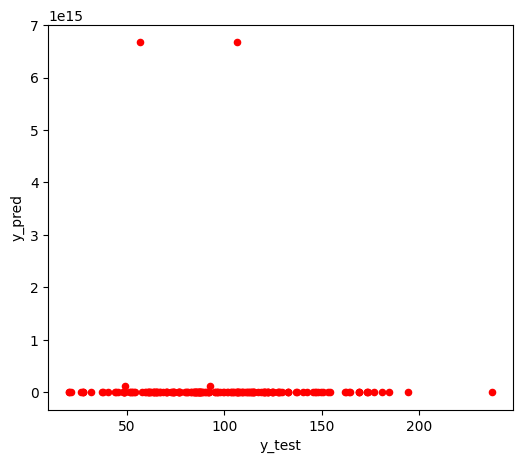


R2 (Linear Regression) = -319909742687799454581391360.000
R2 (Ridge) = 0.354
R2 (Lasso) = 0.349
              Feature    Importance
12       seniority_na  3.079561e+15
13   seniority_senior  3.079561e+15
5                R_yn  1.131741e+14
0              hourly  1.146903e+01
4           python_yn  8.786359e+00
1   employer_provided  5.804485e+00
7                 aws  4.105813e+00
8               excel  3.566224e+00
3                 age  2.364344e+00
6               spark  2.330600e+00


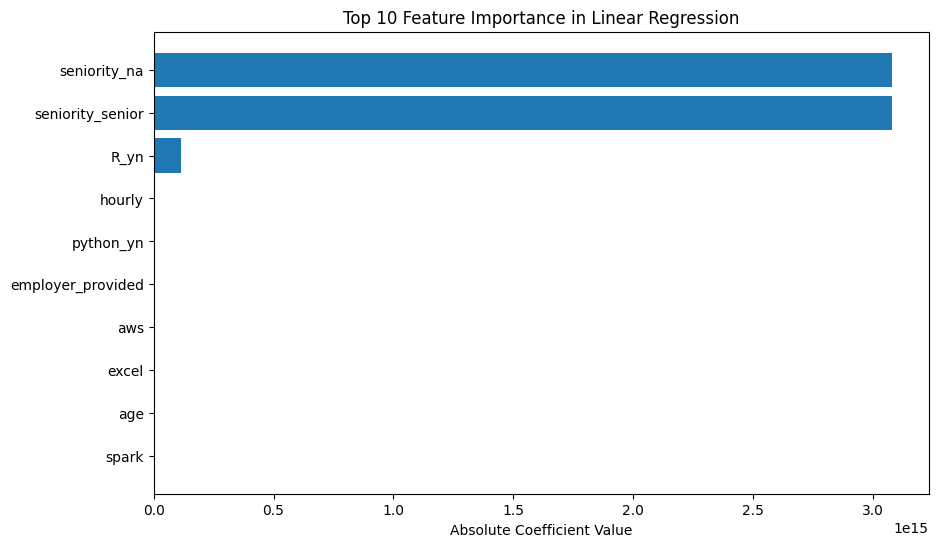

                     hourly  employer_provided  avg_salary  same_state   
hourly             1.000000           0.124748   -0.356082   -0.067351  \
employer_provided  0.124748           1.000000    0.076287   -0.081349   
avg_salary        -0.356082           0.076287    1.000000   -0.034641   
same_state        -0.067351          -0.081349   -0.034641    1.000000   
age                0.007626          -0.109288    0.019655   -0.166680   
python_yn         -0.193487          -0.107924    0.327796    0.006975   
R_yn              -0.009505          -0.007961   -0.040000   -0.058407   
spark             -0.098530          -0.082524    0.176559   -0.053139   
aws               -0.030315          -0.000685    0.171379   -0.065070   
excel             -0.099897           0.074129   -0.057252    0.106026   
desc_len          -0.073194          -0.102218    0.078808    0.062387   
num_comp          -0.117265          -0.116665    0.093813   -0.102635   
seniority_jr      -0.009505          -

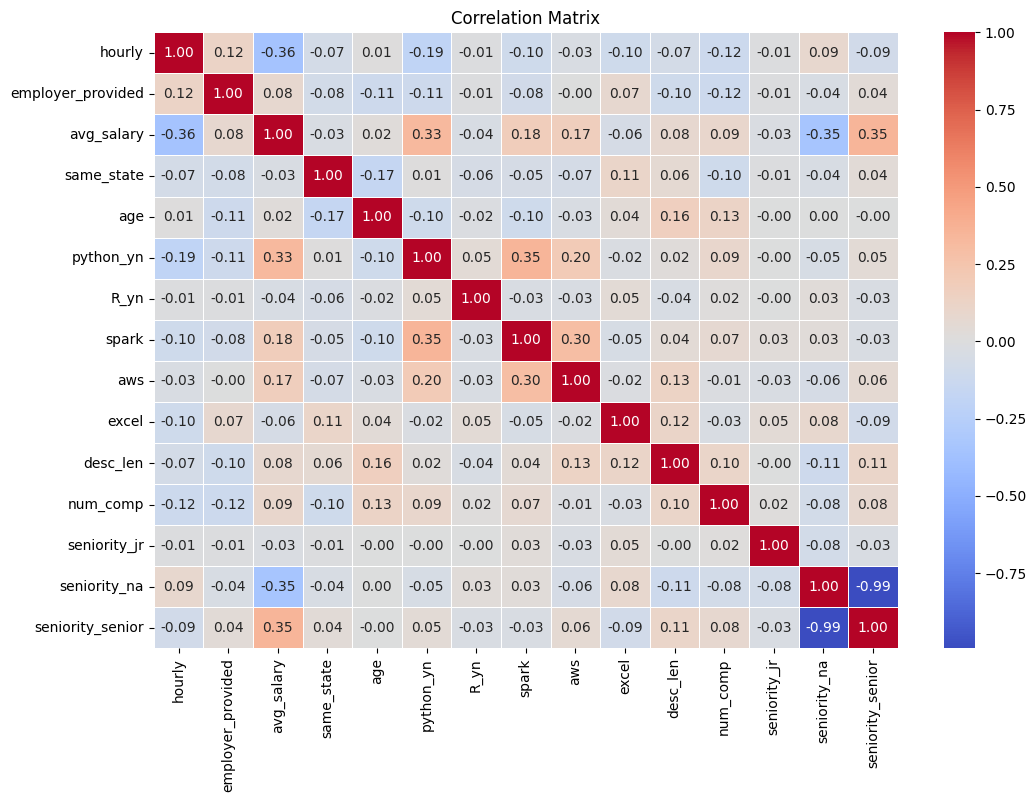

In [780]:
df2 = df[['hourly','employer_provided','avg_salary', 'same_state','age','python_yn','R_yn','spark','aws','excel','desc_len','num_comp', 'seniority']]

encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(df2[['seniority']])

encoded_df = pd.DataFrame(
    encoded, 
    columns=encoder.get_feature_names_out(['seniority']),
    index=df2.index
)

df2 = pd.concat([df2, encoded_df], axis=1)

df2.drop(['seniority'], axis=1, inplace=True)

df2.columns

y = df2['avg_salary']
x = df2.drop(columns=['avg_salary'])

x_train, x_test, y_train, y_test = train_test_split(x, y)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, s=20, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

r2 = model.score(x_test_scaled, y_test)
print('\nR2 (Linear Regression) = {:.3f}'.format(r2))

model = Ridge(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Ridge) = {:.3f}'.format(r2))

model = Lasso(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Lasso) = {:.3f}'.format(r2))

# feature importance
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

importance = abs(model.coef_)

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df.head(10)
print(top_10_features)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()

correlation_matrix = df2.corr()

print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [793]:
import re

pattern = r'\b(?:Master|Bachelor|PhD|Doctoral|Associate|Advanced|Bachelors|Masters)\b'

# Function to apply regex and extract the educational term
def extract_education(description):
    matches = re.findall(pattern, description, flags=re.IGNORECASE)
    return matches[0] if matches else None  # Return first match or None if no match

# Apply the function to the 'Job Description' column
df['Education Requirement'] = df['Job Description'].apply(extract_education)

df['Education Requirement']

0       Bachelor
1       Advanced
2       advanced
3       advanced
4       Advanced
         ...    
737    Bachelors
738         None
739          PhD
740     advanced
741     Bachelor
Name: Education Requirement, Length: 742, dtype: object

In [796]:
df['Education Requirement'].isnull().sum()

141